In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import os
from scipy.spatial.distance import cdist

# Exercício 1

## Inicialização e representação do Gráfico

[[ 4.87437997  2.99755617  0.        ]
 [ 2.78082018  2.25785796  0.        ]
 [ 4.29262526  2.38145076  0.        ]
 ...
 [ 3.75478035  3.00403791  0.        ]
 [-0.0410864  -5.40427261  1.        ]
 [-3.0957853  -4.45340985  1.        ]]


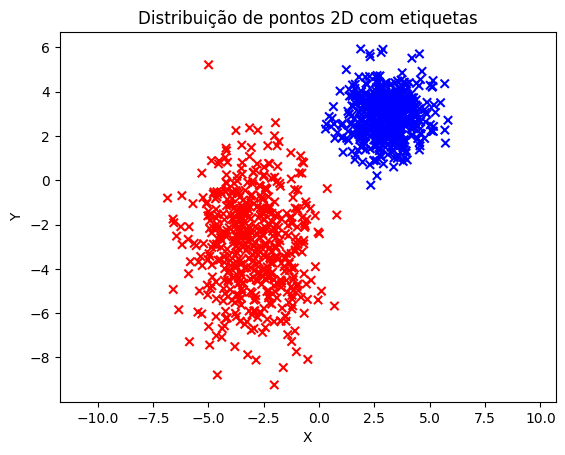

In [3]:
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]

num_pontos = 500
a = np.random.multivariate_normal(mean1, cov1, num_pontos).T

mean2 = [-3, -3]  
cov2 = [[2, 0], [0, 5]] 

b = np.random.multivariate_normal(mean2, cov2, num_pontos).T

# Adição de etiquetas aos conjuntos: 0 para o primeiro conjunto, 1 para o segundo
labels_a = np.zeros((1, a.shape[1]))  # etiquetas para o conjunto a
labels_b = np.ones((1, b.shape[1]))   # etiquetas para o conjunto b

a_with_labels = np.concatenate((a, labels_a), axis=0)
b_with_labels = np.concatenate((b, labels_b), axis=0)

# Junção dos dois conjuntos num único array
c = np.concatenate((a_with_labels, b_with_labels), axis=1)
c = c.T

np.random.shuffle(c)
print(c)

c = c.T
x = c[0]  # coordenadas x
y = c[1]  # coordenadas y
labels = c[2]  # etiquetas

plt.scatter(x, y, c=labels, cmap='bwr', marker='x')
plt.axis('equal')
plt.title('Distribuição de pontos 2D com etiquetas')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Escrita do conjunto num ficheiro CSV
with open('conjunto_pontos.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['X', 'Y', 'Etiqueta'])  # cabeçalho
    for i in range(x.shape[0]):
        writer.writerow([x[i], y[i], int(labels[i])])

### Distância entre pontos

In [4]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [5]:
def run_kmeans(c, alpha=0.05, num_epocas=1):
    # Inicialização aleatória dos centróides r1 e r2 a partir dos dados
    idx = np.random.choice(c.T.shape[0], 2, replace=False)
    r1 = c.T[idx[0]].copy()
    r2 = c.T[idx[1]].copy()
    print("Inicial r1:", r1, "Inicial r2:", r2)

    # Trajetórias completas (i): todas as atualizações
    traj_r1_completo = [r1[:2].copy()]  # posição inicial
    traj_r2_completo = [r2[:2].copy()]  # posição inicial

    # Trajetórias por época (ii): valores finais ao fim de cada época
    traj_r1_ep = [r1[:2].copy()]  # posição inicial
    traj_r2_ep = [r2[:2].copy()]  # posição inicial

    for epoca in range(num_epocas):
        for x in c.T:
            if distance(x[:2], r1[:2]) < distance(x[:2], r2[:2]):
                r1[:2] = (1 - alpha) * r1[:2] + alpha * x[:2]
                traj_r1_completo.append(r1[:2].copy())
            else:
                r2[:2] = (1 - alpha) * r2[:2] + alpha * x[:2]
                traj_r2_completo.append(r2[:2].copy())
        
        traj_r1_ep.append(r1[:2].copy())
        traj_r2_ep.append(r2[:2].copy())

    traj_r1_ep = np.array(traj_r1_ep)
    traj_r2_ep = np.array(traj_r2_ep)
    traj_r1_completo = np.array(traj_r1_completo)
    traj_r2_completo = np.array(traj_r2_completo)

    return traj_r1_completo, traj_r2_completo, traj_r1_ep, traj_r2_ep, r1, r2

Inicial r1: [1.80744459 3.94971058 0.        ] Inicial r2: [2.7682435  3.91115053 0.        ]


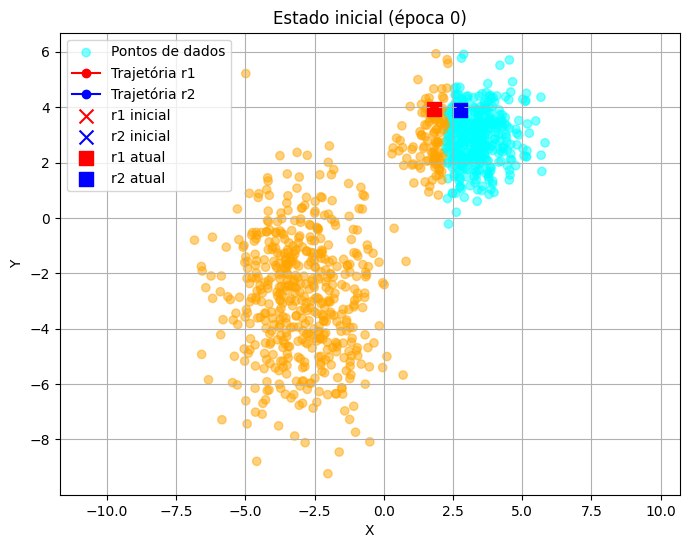

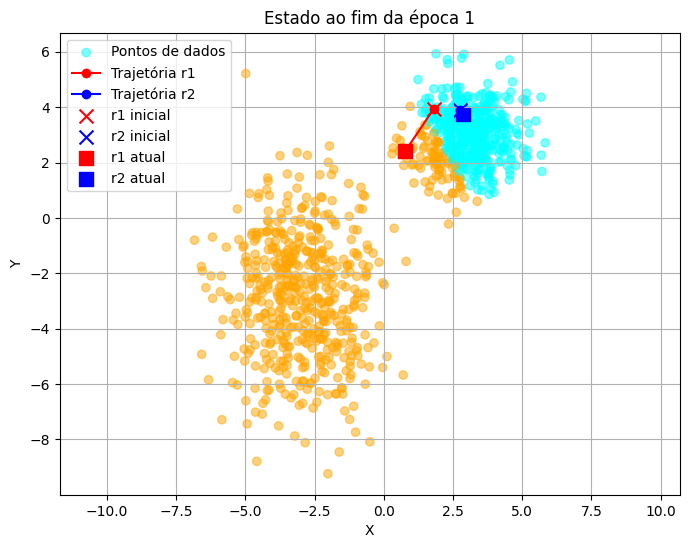

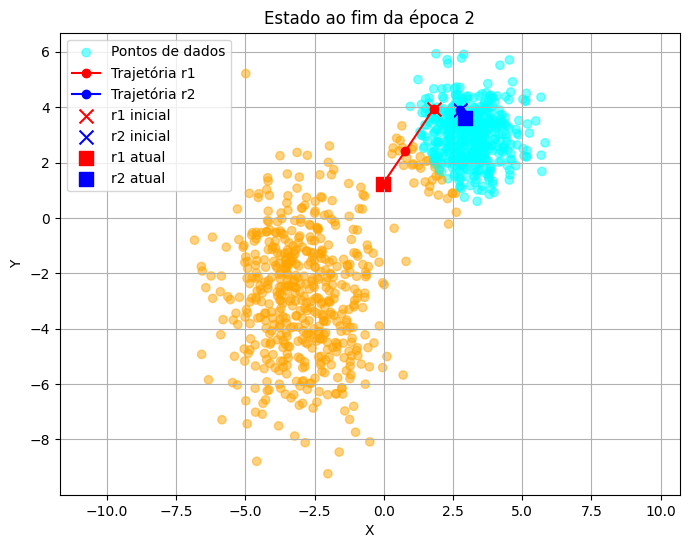

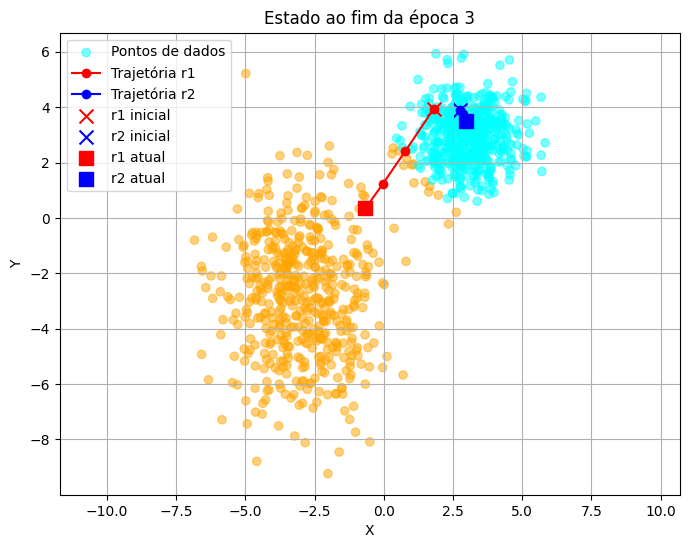

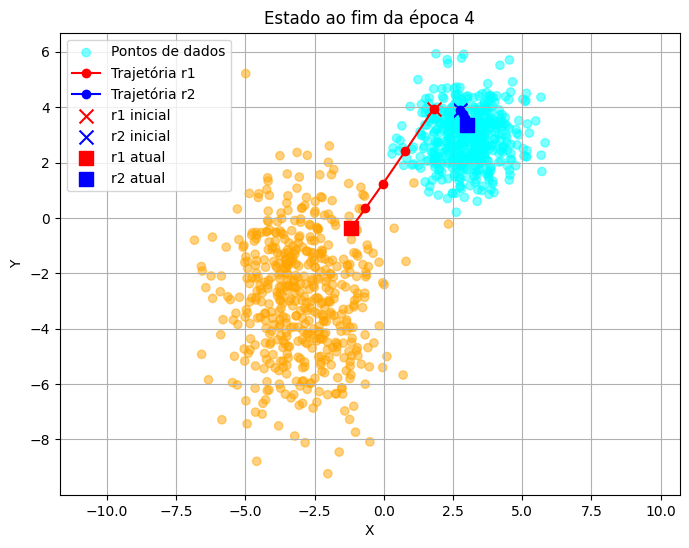

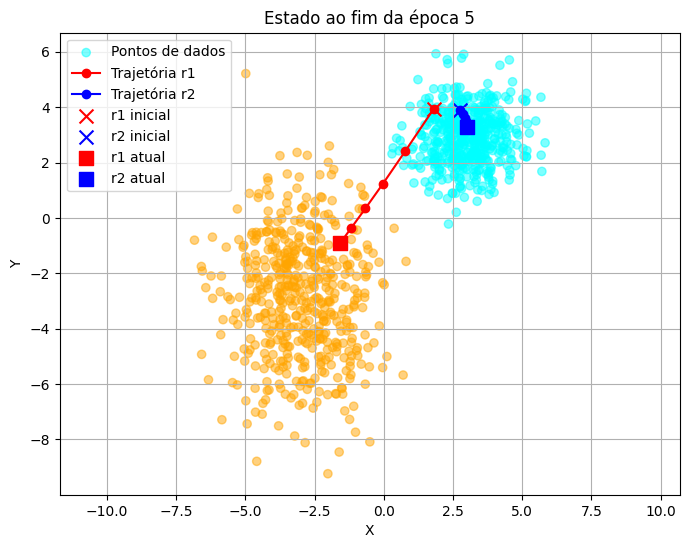

In [7]:

def run_kmeans_plots(c, alpha=0.05, num_epocas=1):
    # Inicialização aleatória dos centróides r1 e r2 a partir dos dados
    idx = np.random.choice(c.T.shape[0], 2, replace=False)
    r1 = c.T[idx[0]].copy()
    r2 = c.T[idx[1]].copy()
    print("Inicial r1:", r1, "Inicial r2:", r2)

    # Trajetórias completas (i): todas as atualizações
    traj_r1_completo = [r1[:2].copy()]  # posição inicial
    traj_r2_completo = [r2[:2].copy()]  # posição inicial

    # Trajetórias por época (ii): valores finais ao fim de cada época
    traj_r1_ep = [r1[:2].copy()]  # posição inicial
    traj_r2_ep = [r2[:2].copy()]  # posição inicial

    # Função auxiliar para computar cores dos pontos com base no centróide mais próximo
    def get_colors():
        colors = []
        for x in c.T:
            if distance(x[:2], r1[:2]) < distance(x[:2], r2[:2]):
                colors.append('orange')
            else:
                colors.append('cyan')
        return colors

    # Plot inicial (época 0)
    colors = get_colors()
    traj_r1_ep_arr = np.array(traj_r1_ep)
    traj_r2_ep_arr = np.array(traj_r2_ep)
    plt.figure(figsize=(8, 6))
    plt.scatter(c.T[:, 0], c.T[:, 1], c=colors, alpha=0.5, label='Pontos de dados')
    plt.plot(traj_r1_ep_arr[:, 0], traj_r1_ep_arr[:, 1], 'r-o', label='Trajetória r1')
    plt.plot(traj_r2_ep_arr[:, 0], traj_r2_ep_arr[:, 1], 'b-o', label='Trajetória r2')
    plt.scatter(traj_r1_ep_arr[0, 0], traj_r1_ep_arr[0, 1], c='red', marker='x', s=100, label='r1 inicial')
    plt.scatter(traj_r2_ep_arr[0, 0], traj_r2_ep_arr[0, 1], c='blue', marker='x', s=100, label='r2 inicial')
    plt.scatter(r1[0], r1[1], c='red', marker='s', s=100, label='r1 atual')
    plt.scatter(r2[0], r2[1], c='blue', marker='s', s=100, label='r2 atual')
    plt.title('Estado inicial (época 0)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Execução do algoritmo K-Means 
    for epoca in range(num_epocas):
        for x in c.T:
            if distance(x[:2], r1[:2]) < distance(x[:2], r2[:2]):
                r1[:2] = (1 - alpha) * r1[:2] + alpha * x[:2]
                traj_r1_completo.append(r1[:2].copy())
            else:
                r2[:2] = (1 - alpha) * r2[:2] + alpha * x[:2]
                traj_r2_completo.append(r2[:2].copy())
        
        traj_r1_ep.append(r1[:2].copy())
        traj_r2_ep.append(r2[:2].copy())

        # Plot ao fim de cada época
        colors = get_colors()
        traj_r1_ep_arr = np.array(traj_r1_ep)
        traj_r2_ep_arr = np.array(traj_r2_ep)
        plt.figure(figsize=(8, 6))
        plt.scatter(c.T[:, 0], c.T[:, 1], c=colors, alpha=0.5, label='Pontos de dados')
        plt.plot(traj_r1_ep_arr[:, 0], traj_r1_ep_arr[:, 1], 'r-o', label='Trajetória r1')
        plt.plot(traj_r2_ep_arr[:, 0], traj_r2_ep_arr[:, 1], 'b-o', label='Trajetória r2')
        plt.scatter(traj_r1_ep_arr[0, 0], traj_r1_ep_arr[0, 1], c='red', marker='x', s=100, label='r1 inicial')
        plt.scatter(traj_r2_ep_arr[0, 0], traj_r2_ep_arr[0, 1], c='blue', marker='x', s=100, label='r2 inicial')
        plt.scatter(r1[0], r1[1], c='red', marker='s', s=100, label='r1 atual')
        plt.scatter(r2[0], r2[1], c='blue', marker='s', s=100, label='r2 atual')
        plt.title(f'Estado ao fim da época {epoca + 1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.axis('equal')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Converter trajetórias para arrays
    traj_r1_ep = np.array(traj_r1_ep)
    traj_r2_ep = np.array(traj_r2_ep)
    traj_r1_completo = np.array(traj_r1_completo)
    traj_r2_completo = np.array(traj_r2_completo)

    return traj_r1_completo, traj_r2_completo, traj_r1_ep, traj_r2_ep, r1, r2

# Exemplo de chamada (substitua pelos seus parâmetros)
traj_r1_completo, traj_r2_completo, traj_r1_ep, traj_r2_ep, r1_final, r2_final = run_kmeans_plots(c, alpha=0.0005, num_epocas=5)

Contexto Inicial

O código original (run_kmeans) inicializa dois centróides (r1 e r2) aleatoriamente a partir dos dados c (um array de pontos, presumivelmente em 2D).
Atualiza os centróides de forma incremental usando uma taxa de aprendizagem alpha (como uma versão online do K-Means).
Regista trajetórias: uma completa (todas as atualizações) e outra por época (apenas no final de cada época).
No final, plota as trajetórias por época, com os pontos de dados em cinzento.

Modificações Feitas

Visualização por Época com Cores nos Pontos:

Adicionei plots separados para cada época (incluindo o estado inicial como época 0).
Em cada plot, os pontos de dados são coloridos com base no centróide mais próximo: vermelho para r1, azul para r2.
As trajetórias por época são mostradas até ao ponto atual, com marcadores para inicial e atual.


Correção de Erro:

Resolvi um TypeError ao converter as listas de trajetórias (traj_r1_ep e traj_r2_ep) para arrays NumPy antes de plotar, para permitir indexação como [:, 0].


Adição de Outlines Pretos:

Nos scatters dos pontos de dados, adicionei edgecolor='black' e linewidth=0.5 para criar um outline preto em cada ponto, ajudando a distinguir melhor os clusters, especialmente se houver sobreposição.



Estado Atual

A função agora gera 6 plots automáticos (1 inicial + 5 épocas, com num_epocas=5 e alpha=0.0005).
Cada plot inclui:

Pontos coloridos (com outline preto).
Trajetórias dos centróides (linhas com pontos).
Marcadores para posições inicial e atual.


O código é executável diretamente, assumindo que c é o teu dataset (ex.: um array NumPy de pontos).
Se correres o código fornecido na última mensagem, verás os resultados visuais.

## 2. Grafico i)

Inicial r1: [-5.90667943 -2.664256    1.        ] Inicial r2: [-2.10028051 -5.12237508  1.        ]


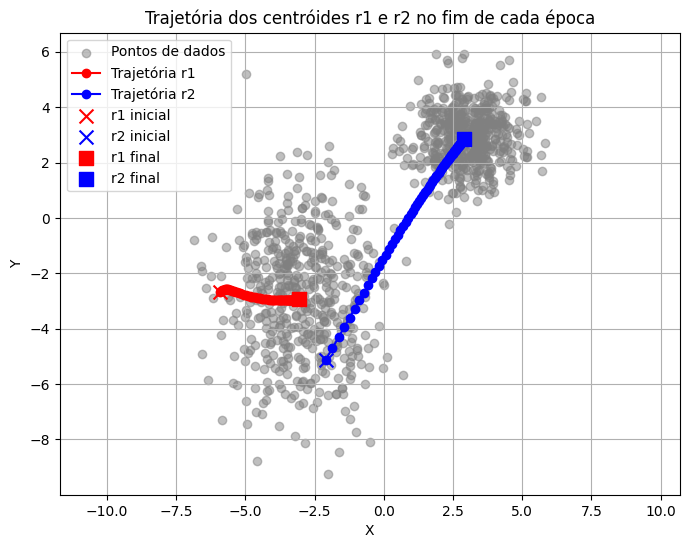

In [10]:
traj_r1_completo, traj_r2_completo, traj_r1_ep, traj_r2_ep, r1_final, r2_final = run_kmeans(c, alpha=10e-5, num_epocas=100)
#traj_r1_completo, traj_r2_completo, traj_r1_ep, traj_r2_ep, r1_final, r2_final = run_kmeans(c, alpha=0.05, num_epocas=200) # com α maior vemos uma maior oscilação dos pontos

# Agora o plot utilizando os retornos da função
plt.figure(figsize=(8, 6))
plt.scatter(c.T[:, 0], c.T[:, 1], c='gray', alpha=0.5, label='Pontos de dados')
plt.plot(traj_r1_ep[:, 0], traj_r1_ep[:, 1], 'r-o', label='Trajetória r1')
plt.plot(traj_r2_ep[:, 0], traj_r2_ep[:, 1], 'b-o', label='Trajetória r2')
plt.scatter(traj_r1_ep[0, 0], traj_r1_ep[0, 1], c='red', marker='x', s=100, label='r1 inicial')
plt.scatter(traj_r2_ep[0, 0], traj_r2_ep[0, 1], c='blue', marker='x', s=100, label='r2 inicial')
plt.scatter(traj_r1_ep[-1, 0], traj_r1_ep[-1, 1], c='red', marker='s', s=100, label='r1 final')
plt.scatter(traj_r2_ep[-1, 0], traj_r2_ep[-1, 1], c='blue', marker='s', s=100, label='r2 final')
plt.title('Trajetória dos centróides r1 e r2 no fim de cada época')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

## 2. Gráfico ii)

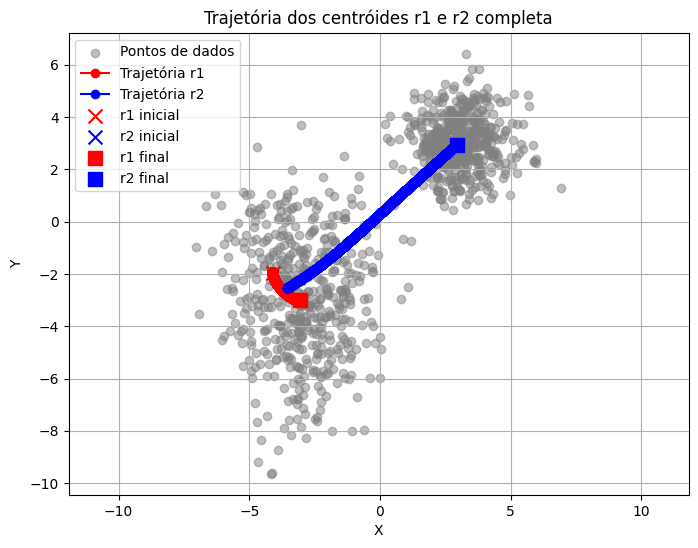

In [196]:
# traj_r1_completo, traj_r2_completo, traj_r1_ep, traj_r2_ep, r1_final, r2_final = run_kmeans(c, alpha=0.05, num_epocas=100)

# Agora o plot utilizando os retornos da função para a trajetória completa
plt.figure(figsize=(8, 6))
plt.scatter(c.T[:, 0], c.T[:, 1], c='gray', alpha=0.5, label='Pontos de dados')
plt.plot(traj_r1_completo[:, 0], traj_r1_completo[:, 1], 'r-o', label='Trajetória r1')
plt.plot(traj_r2_completo[:, 0], traj_r2_completo[:, 1], 'b-o', label='Trajetória r2')
plt.scatter(traj_r1_completo[0, 0], traj_r1_completo[0, 1], c='red', marker='x', s=100, label='r1 inicial')
plt.scatter(traj_r2_completo[0, 0], traj_r2_completo[0, 1], c='blue', marker='x', s=100, label='r2 inicial')
plt.scatter(traj_r1_completo[-1, 0], traj_r1_completo[-1, 1], c='red', marker='s', s=100, label='r1 final')
plt.scatter(traj_r2_completo[-1, 0], traj_r2_completo[-1, 1], c='blue', marker='s', s=100, label='r2 final')
plt.title('Trajetória dos centróides r1 e r2 completa')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

Quando analisamos todas as atualizações , observamos uma oscilação acentuada dos pontos quando utilizamos valores de α elevados, obtendo uma taxa de atualização maior.
No gráfico com valores finais por época, a trajetória é mais suave, mostrando convergência gradual.
Com α pequeno, as atualizações são mais estáveis, mas a convergência é lenta; com α grande, há oscilações maiores, mas a convergência é maior.
A relação existente entre os representantes e os parâmetros são: α controla a velocidade e estabilidade da convergência, e o número de épocas define se os centróides atingem posições próximas aos centros dos clusters.

## 4. Valores acumulados

In [12]:
def run_kmeans_acc(c, alpha=0.0005, num_epocas=50):
    # Inicialização aleatória dos centróides r1 e r2 a partir dos dados
    idx = np.random.choice(c.T.shape[0], 2, replace=False)
    r1_acc = c.T[idx[0]].copy()
    r2_acc = c.T[idx[1]].copy()
    print("Inicial r1_acc:", r1_acc, "Inicial r2_acc:", r2_acc)

    # Trajetórias por época: valores iniciais e ao fim de cada época
    traj_r1_acc = [r1_acc[:2].copy()]  # posição inicial
    traj_r2_acc = [r2_acc[:2].copy()]  # posição inicial

    for epoca in range(num_epocas):
        # Inicializar acumulações
        d_r1_acc = np.zeros(2)
        d_r2_acc = np.zeros(2)

        # Acumular deslocamentos
        for x in c.T:
            if distance(x[:2], r1_acc[:2]) < distance(x[:2], r2_acc[:2]):
                d_r1_acc += (x[:2] - r1_acc[:2])
                
            else:
                d_r2_acc += (x[:2] - r2_acc[:2])
            
        r1_acc[:2] += (alpha / c.T.shape[0]) * d_r1_acc
        r2_acc[:2] += (alpha / c.T.shape[0]) * d_r2_acc

        # Armazenar posições atualizadas
        traj_r1_acc.append(r1_acc[:2].copy())
        traj_r2_acc.append(r2_acc[:2].copy())

    traj_r1_acc = np.array(traj_r1_acc)
    traj_r2_acc = np.array(traj_r2_acc)


    return traj_r1_acc, traj_r2_acc, r1_acc, r2_acc

Inicial r1_acc: [-5.97450613 -4.36622615  1.        ] Inicial r2_acc: [-3.08215821 -3.06617452  1.        ]


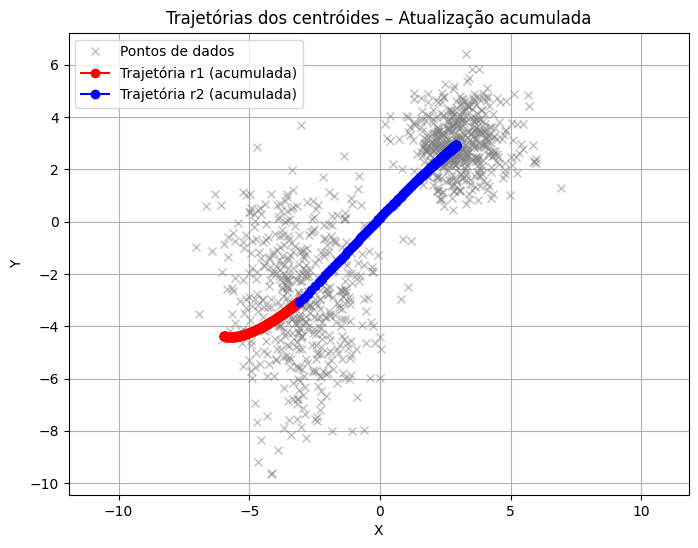

In [ ]:
traj_r1_acc, traj_r2_acc, r1_acc_final, r2_acc_final = run_kmeans_acc(c, alpha=0.05, num_epocas=200)

plt.figure(figsize=(8, 6)) 
plt.plot(c[0, :], c[1, :], 'x', color='gray', alpha=0.5, label='Pontos de dados')
plt.plot(traj_r1_acc[:, 0], traj_r1_acc[:, 1], 'r-o', label='Trajetória r1 (acumulada)')
plt.plot(traj_r2_acc[:, 0], traj_r2_acc[:, 1], 'b-o', label='Trajetória r2 (acumulada)')
plt.axis('equal')
plt.legend()
plt.title("Trajetórias dos centróides – Atualização acumulada")
plt.xlabel('X')  
plt.ylabel('Y')  
plt.grid(True) 
plt.show()

Inicial r1_acc: [-2.40123126 -0.37896964  1.        ] Inicial r2_acc: [2.60942597 4.4327225  0.        ]


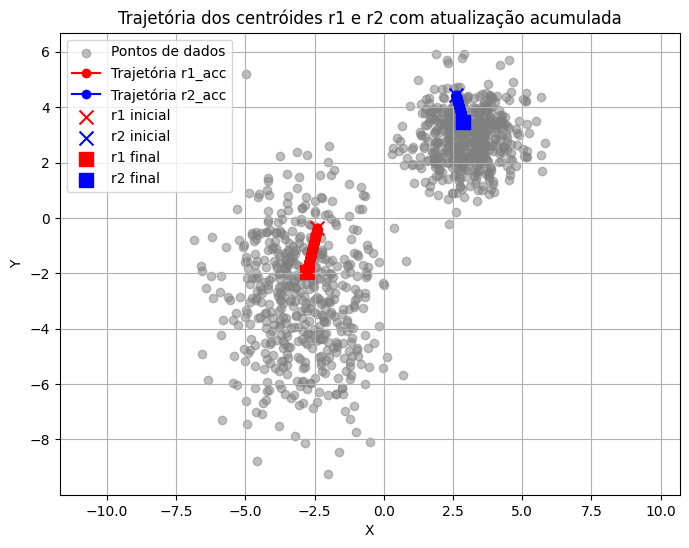

In [13]:
traj_r1_acc, traj_r2_acc, r1_acc_final, r2_acc_final = run_kmeans_acc(c, alpha=0.01, num_epocas=200)

plt.figure(figsize=(8, 6))
plt.scatter(c.T[:, 0], c.T[:, 1], c='gray', alpha=0.5, label='Pontos de dados')

plt.plot(traj_r1_acc[:, 0], traj_r1_acc[:, 1], 'r-o', label='Trajetória r1_acc')
plt.plot(traj_r2_acc[:, 0], traj_r2_acc[:, 1], 'b-o', label='Trajetória r2_acc')

plt.scatter(traj_r1_acc[0, 0], traj_r1_acc[0, 1], c='red', marker='x', s=100, label='r1 inicial')
plt.scatter(traj_r2_acc[0, 0], traj_r2_acc[0, 1], c='blue', marker='x', s=100, label='r2 inicial')

plt.scatter(traj_r1_acc[-1, 0], traj_r1_acc[-1, 1], c='red', marker='s', s=100, label='r1 final')
plt.scatter(traj_r2_acc[-1, 0], traj_r2_acc[-1, 1], c='blue', marker='s', s=100, label='r2 final')

plt.title('Trajetória dos centróides r1 e r2 com atualização acumulada')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
def classify_points(c, r1_acc, r2_acc):
    r1_final = r1_acc[:2]  # x e y do centróide r1 final
    r2_final = r2_acc[:2]  # x e y do centróide r2 final

    etiquetas = c[2, :]  # extrair a linha das etiquetas originais

    r1_lab1 = []  # pontos com etiqueta 1 próximos de r1
    r1_lab2 = []  # pontos com etiqueta 2 próximos de r1
    r2_lab1 = []  # pontos com etiqueta 1 próximos de r2
    r2_lab2 = []  # pontos com etiqueta 2 próximos de r2

    for i in range(c.T.shape[0]):
        x = c[:2, i]               # coordenadas (x, y) do ponto i
        label = int(etiquetas[i])  # etiqueta (1 ou 2)

        # Verifica qual centróide está mais próximo do ponto
        if distance(x, r1_final) < distance(x, r2_final):
            if label == 1:
                r1_lab1.append(x)
            else:
                r1_lab2.append(x)
        else:
            if label == 1:
                r2_lab1.append(x)
            else:
                r2_lab2.append(x)

    r1_lab1 = np.array(r1_lab1) if r1_lab1 else np.array([])
    r1_lab2 = np.array(r1_lab2) if r1_lab2 else np.array([])
    r2_lab1 = np.array(r2_lab1) if r2_lab1 else np.array([])
    r2_lab2 = np.array(r2_lab2) if r2_lab2 else np.array([])

    return r1_lab1, r1_lab2, r2_lab1, r2_lab2

Inicial r1_acc: [-2.63626243 -0.38912862  1.        ] Inicial r2_acc: [3.65783682 2.47560914 0.        ]


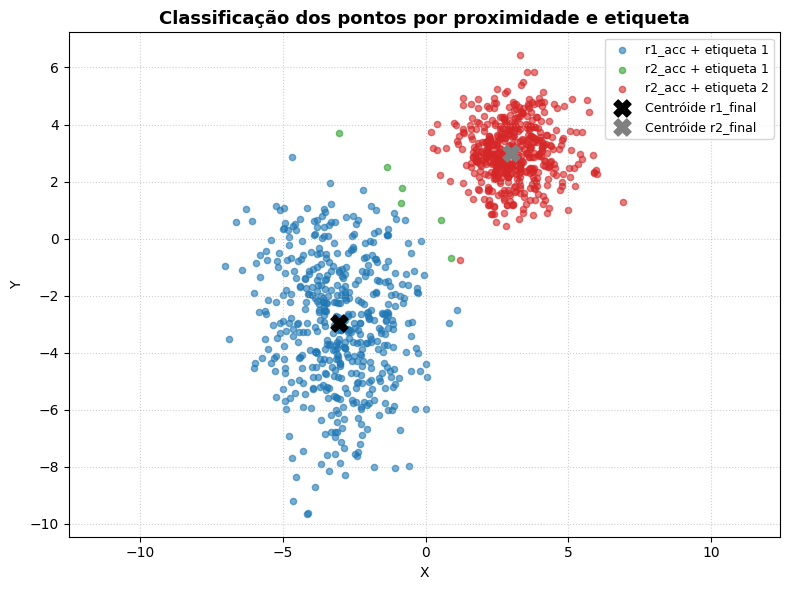

In [205]:
traj_r1_acc, traj_r2_acc, r1_acc_final, r2_acc_final = run_kmeans_acc(c, alpha=0.05, num_epocas=200)

r1_lab1, r1_lab2, r2_lab1, r2_lab2 = classify_points(c, r1_acc_final, r2_acc_final)

# Definir os centróides finais (x, y)
r1_final = r1_acc_final[:2]
r2_final = r2_acc_final[:2]

# Gerar o gráfico
plt.figure(figsize=(8, 6))

if len(r1_lab1) > 0:
    plt.scatter(r1_lab1[:,0], r1_lab1[:,1], 
                c='#1f77b4', s=20, alpha=0.6, 
                label='r1_acc + etiqueta 1')
if len(r1_lab2) > 0:
    plt.scatter(r1_lab2[:,0], r1_lab2[:,1], 
                c="#ff0ecb", s=20, alpha=0.6, 
                label='r1_acc + etiqueta 2')
if len(r2_lab1) > 0:
    plt.scatter(r2_lab1[:,0], r2_lab1[:,1], 
                c='#2ca02c', s=20, alpha=0.6, 
                label='r2_acc + etiqueta 1')
if len(r2_lab2) > 0:
    plt.scatter(r2_lab2[:,0], r2_lab2[:,1], 
                c='#d62728', s=20, alpha=0.6, 
                label='r2_acc + etiqueta 2')

plt.scatter(r1_final[0], r1_final[1], 
            marker='X', s=150, color='black', 
            label='Centróide r1_final')
plt.scatter(r2_final[0], r2_final[1], 
            marker='X', s=150, color='gray', 
            label='Centróide r2_final')

plt.axis('equal')  # mantém escala igual nos eixos X e Y
plt.title("Classificação dos pontos por proximidade e etiqueta", 
          fontsize=13, fontweight='bold')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best', fontsize=9)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


## 7. Repetir 30 vezes

Inicial r1: [-3.69966866 -2.85181897  1.        ] Inicial r2: [-3.48078721 -0.66609473  1.        ]
Inicial r1: [-1.23275868 -4.84861264  1.        ] Inicial r2: [4.77545978 1.98899664 0.        ]
Inicial r1: [-3.0190807  -4.46057313  1.        ] Inicial r2: [-5.2216153  -0.79168254  1.        ]
Inicial r1: [-4.30187497 -5.89744808  1.        ] Inicial r2: [5.39532219 2.98346624 0.        ]
Inicial r1: [-2.42813105 -4.29081136  1.        ] Inicial r2: [2.75995872 2.6369054  0.        ]
Inicial r1: [-1.91081552 -3.61491823  1.        ] Inicial r2: [2.83667841 2.34639224 0.        ]
Inicial r1: [-4.97747322 -3.76098535  1.        ] Inicial r2: [2.87406745 1.69152188 0.        ]
Inicial r1: [2.72707912 4.27805951 0.        ] Inicial r2: [3.61365439 4.89952777 0.        ]
Inicial r1: [4.77545978 1.98899664 0.        ] Inicial r2: [2.93213652 3.66228406 0.        ]
Inicial r1: [3.07482389 4.52017536 0.        ] Inicial r2: [-1.40327735 -2.88401234  1.        ]
Inicial r1: [2.54763123 3.5942

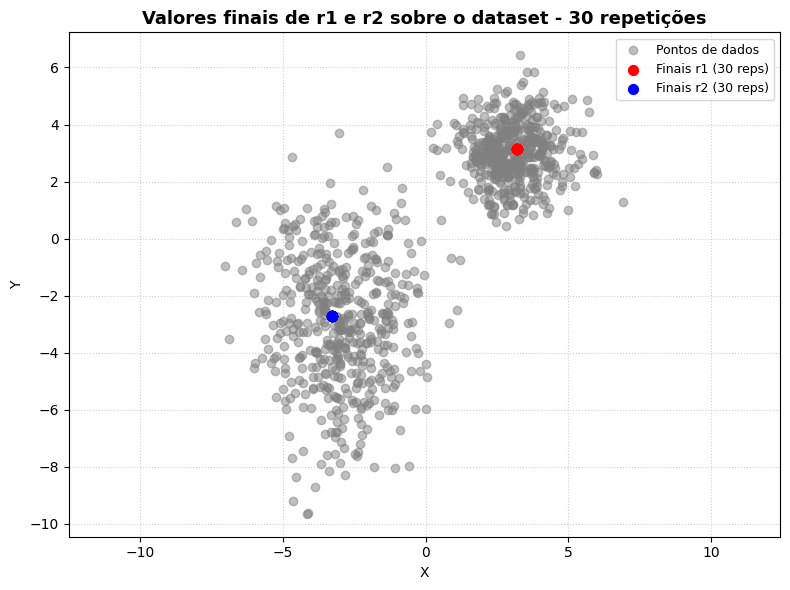

In [ ]:
r1_finals = []
r2_finals = []
for _ in range(30):
    _, _, _, _, r1_final, r2_final = run_kmeans(c, alpha=0.05, num_epocas=20)
    
    if np.sum(r1_final[:2]) < np.sum(r2_final[:2]):
        r1_final, r2_final = r2_final, r1_final  
        
    r1_finals.append(r1_final[:2])
    r2_finals.append(r2_final[:2])


r1_finals = np.array(r1_finals)
r2_finals = np.array(r2_finals)

# Plotar os valores finais
plt.figure(figsize=(8, 6))
plt.scatter(c[0, :], c[1, :], c='gray', alpha=0.5, label='Pontos de dados')
plt.scatter(r1_finals[:, 0], r1_finals[:, 1], c='red', marker='o', s=50, label='Finais r1 (30 reps)')
plt.scatter(r2_finals[:, 0], r2_finals[:, 1], c='blue', marker='o', s=50, label='Finais r2 (30 reps)')
plt.title('Valores finais de r1 e r2 sobre o dataset - 30 repetições', fontsize=13, fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend(loc='best', fontsize=9)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()



plt.show()

# Exercício 2

In [ ]:
rng = np.random.default_rng(42) 
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
points1 = rng.multivariate_normal(mean1, cov1, 5)

mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
points2 = rng.multivariate_normal(mean2, cov2, 5)

# mean3 = [-2, 4]
# cov3 = [[2, 0], [0, 5]]
# points3 = rng.multivariate_normal(mean3, cov3, 100)

points = np.vstack((points1, points2))
rng.shuffle(points)

In [ ]:
def agglomerative_clustering(points):
    clusters = [p.copy() for p in points]  # Cada ponto inicia como um cluster
    history = [np.array(clusters)]  # Salvar estado inicial
    
    while len(clusters) > 2:
        # Encontrar os dois clusters mais próximos
        min_dist = float('inf')
        pair = (0, 1)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                d = distance(clusters[i], clusters[j])
                if d < min_dist:
                    min_dist = d
                    pair = (i, j)
        
        # media
        i, j = pair  # i < j
        avg = (clusters[i] + clusters[j]) / 2
        
        # Remover os dois
        del clusters[j]
        del clusters[i]
        
        # Adicionar o novo cluster
        clusters.append(avg)
        
        history.append(np.array(clusters))
    
    return clusters, history

Clusters finais:
[4.0106561 4.3776252]
[-3.30524187 -1.90884369]


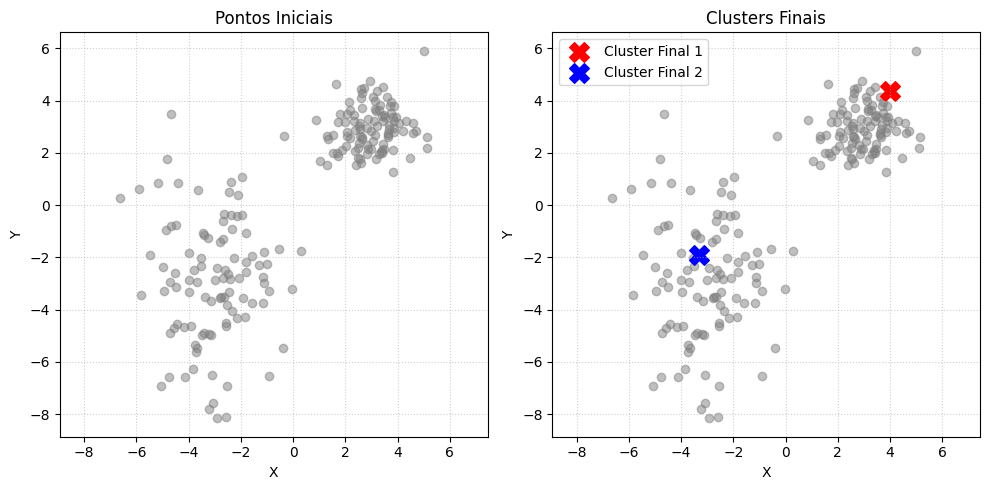

In [134]:
# Executar o algoritmo
final_clusters, history = agglomerative_clustering(points)

# Imprimir os clusters finais
print("Clusters finais:")
print(final_clusters[0])
print(final_clusters[1])

# Plotar inicial e final
plt.figure(figsize=(10, 5))

# Plot inicial
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1], c='gray', alpha=0.5)
plt.title('Pontos Iniciais')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True, linestyle=':', alpha=0.6)

# Plot final
plt.subplot(1, 2, 2)
plt.scatter(points[:, 0], points[:, 1], c='gray', alpha=0.5)
plt.scatter(final_clusters[0][0], final_clusters[0][1], c='red', marker='X', s=200, label='Cluster Final 1')
plt.scatter(final_clusters[1][0], final_clusters[1][1], c='blue', marker='X', s=200, label='Cluster Final 2')
plt.title('Clusters Finais')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend(loc='best')
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

Clusters finais:
[-2.39566133 -2.20110009]
[2.24607    2.42620685]


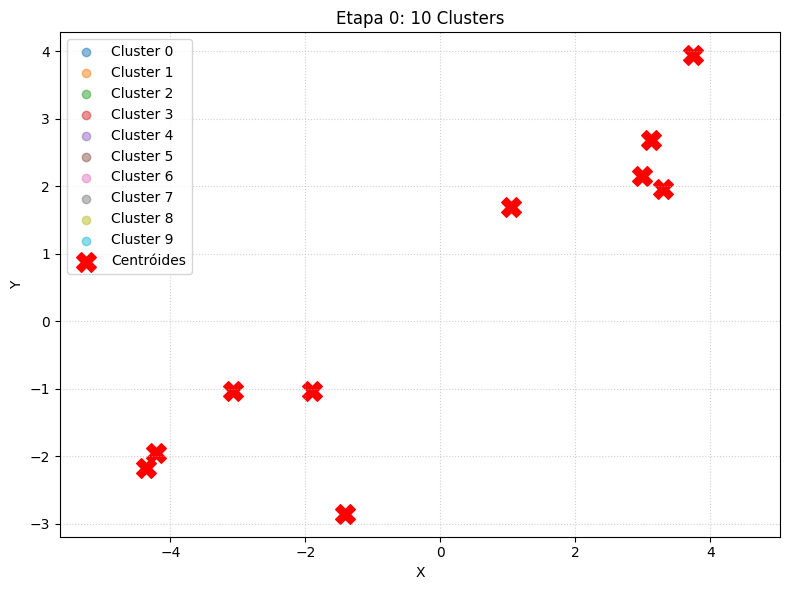

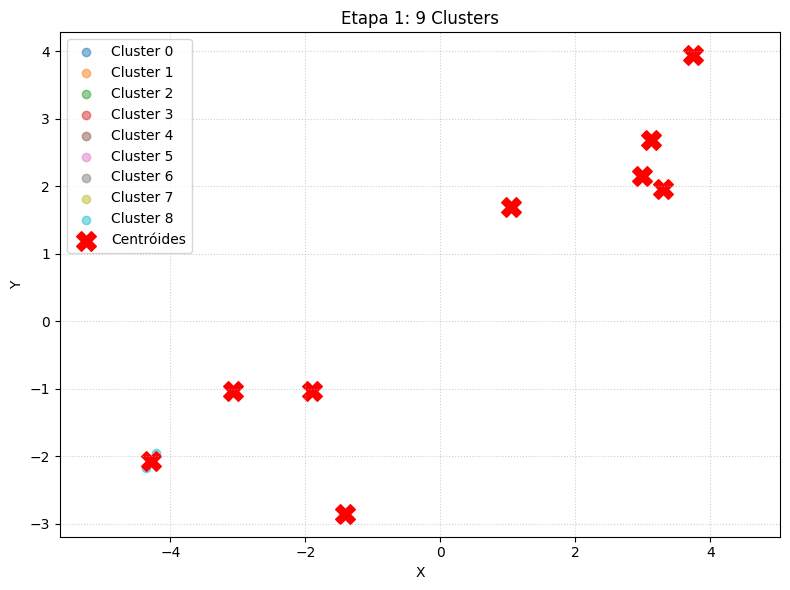

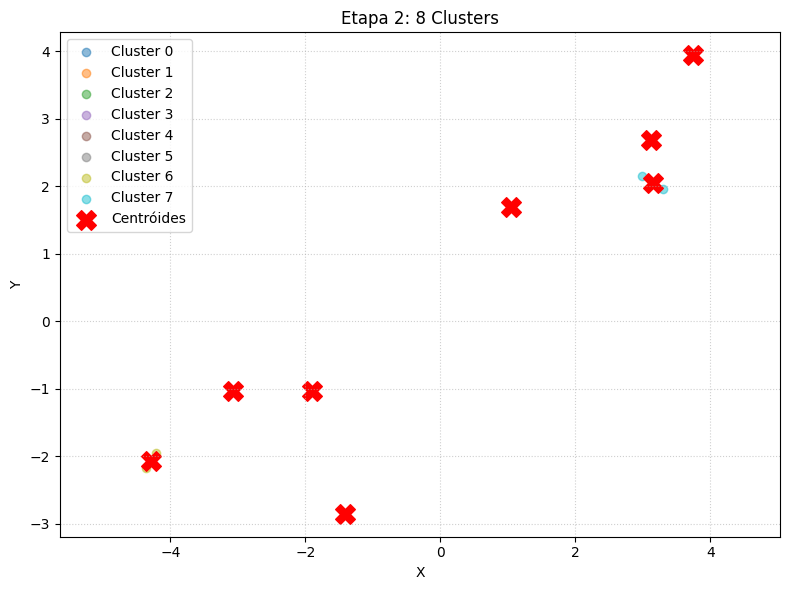

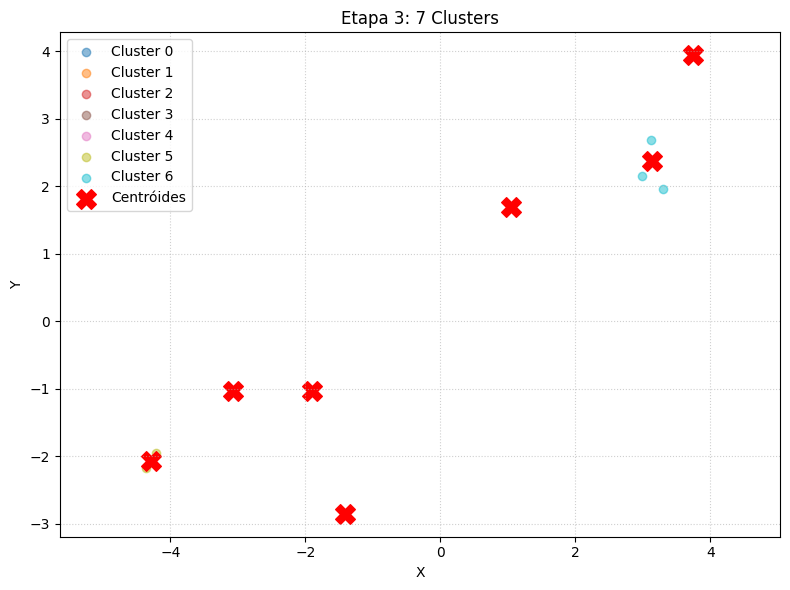

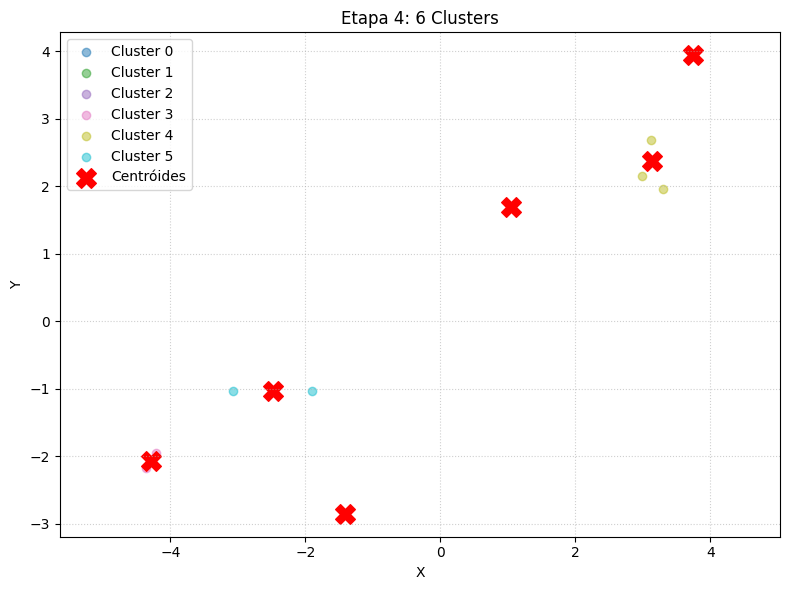

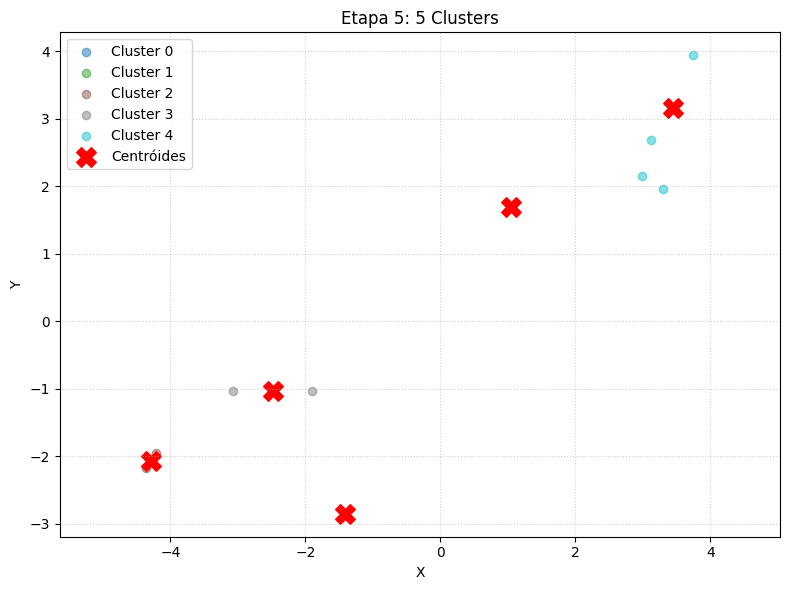

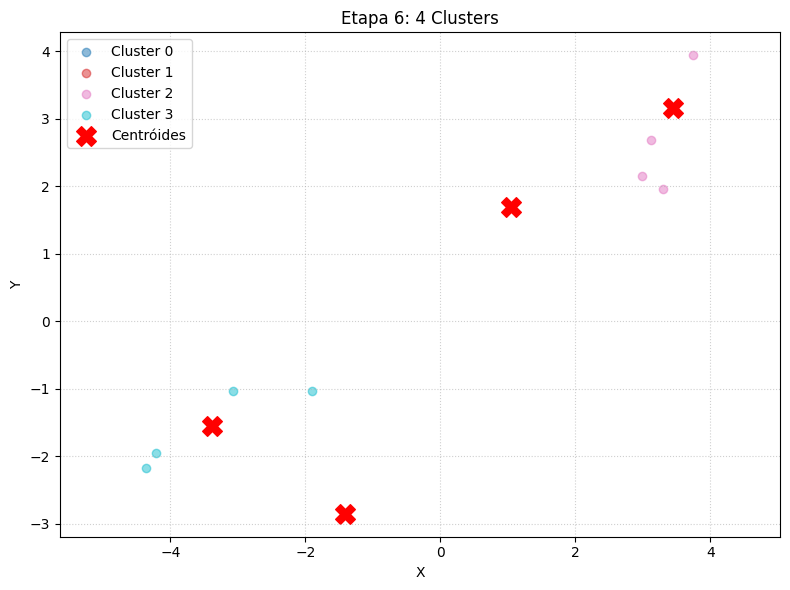

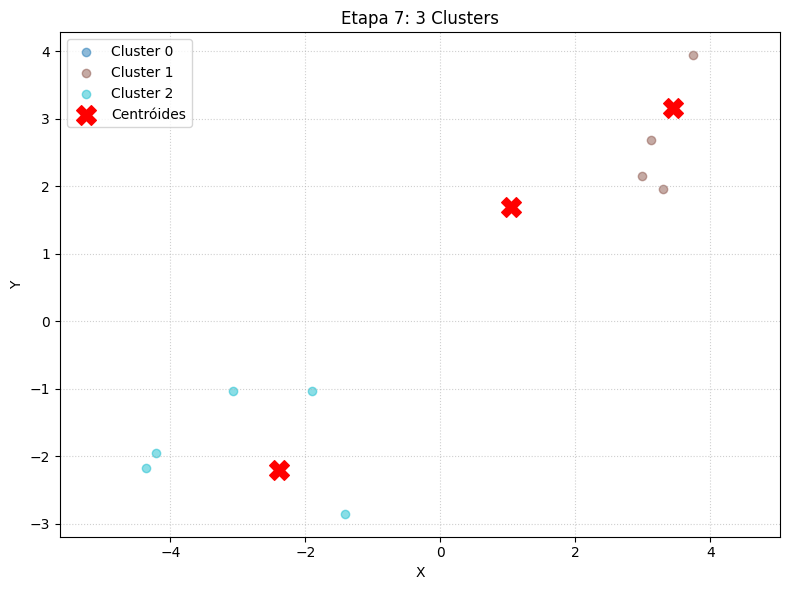

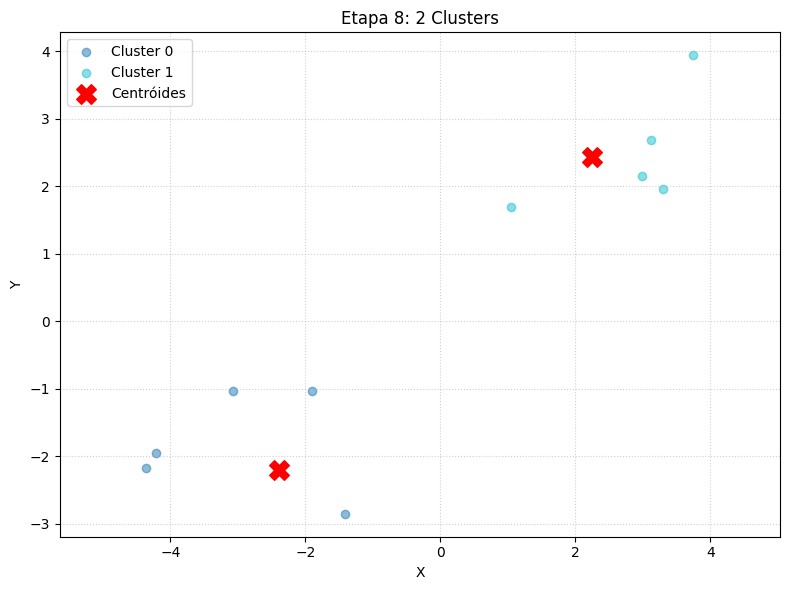

In [226]:
def agglomerative_clustering(points):
    clusters = [p.copy() for p in points]  # Cada ponto inicia como um cluster
    history = [np.array(clusters)]  # Snapshot inicial
    
    while len(clusters) > 2:
        # Encontrar os dois clusters mais próximos
        min_dist = float('inf')
        pair = (0, 1)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                d = distance(clusters[i], clusters[j])
                if d < min_dist:
                    min_dist = d
                    pair = (i, j)
        
        # Fundir os dois (média)
        i, j = pair  # i < j
        avg = (clusters[i] + clusters[j]) / 2
        
        # Remover os dois (índice maior primeiro)
        del clusters[j]
        del clusters[i]
        
        # Adicionar o novo
        clusters.append(avg)
        
        # Salvar snapshot
        history.append(np.array(clusters))
    
    return clusters, history

# Gerar pontos de exemplo se não definidos (dois clusters gaussianos com 10 pontos)
np.random.seed(42)  # Para reproducibilidade
if 'points' not in globals():
    cluster1 = np.random.normal(loc=[0, 0], scale=0.5, size=(5, 2))
    cluster2 = np.random.normal(loc=[3, 3], scale=0.5, size=(5, 2))
    points = np.vstack([cluster1, cluster2])

# Executar o algoritmo
final_clusters, history = agglomerative_clustering(points)

# Imprimir os clusters finais
print("Clusters finais:")
print(final_clusters[0])
print(final_clusters[1])

# Função para plotar uma etapa específica
def plot_cluster_step(points, centroids, step, num_clusters):
    # Atribuir cada ponto ao cluster mais próximo (para colorir)
    dists = cdist(points, centroids)
    labels = np.argmin(dists, axis=1)
    
    # Plot
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Cores automáticas
    
    for idx, label in enumerate(unique_labels):
        plt.scatter(points[labels == label, 0], points[labels == label, 1],
                    color=colors[idx], label=f'Cluster {label}', alpha=0.5)
    
    # Centróides
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centróides')
    
    plt.title(f'Etapa {step}: {num_clusters} Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.legend(loc='best')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Gerar plots para todas as etapas (de len(points) até 2 clusters)
for step, centroids in enumerate(history):
    num_clusters = len(centroids)
    plot_cluster_step(points, centroids, step, num_clusters)

# Exercício 3

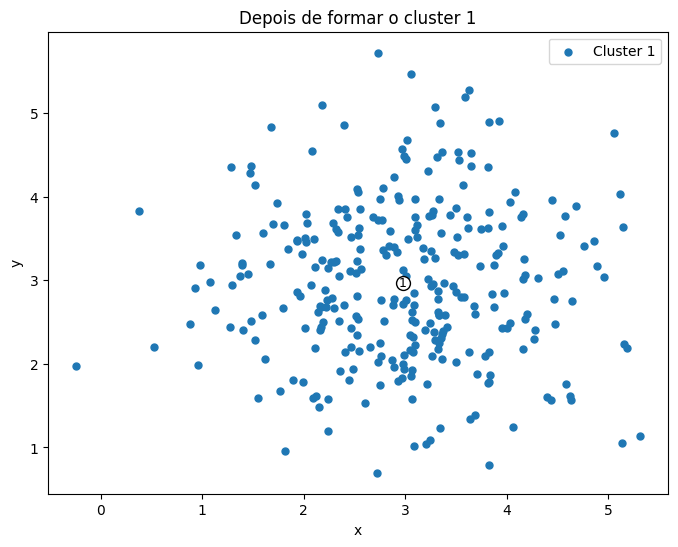

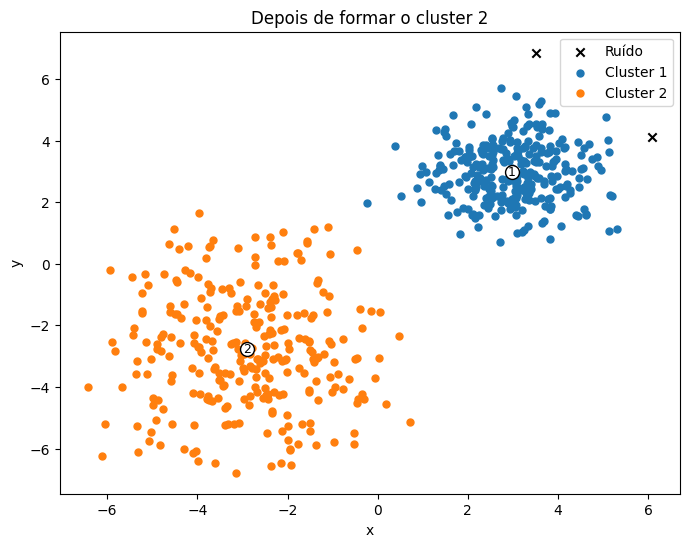

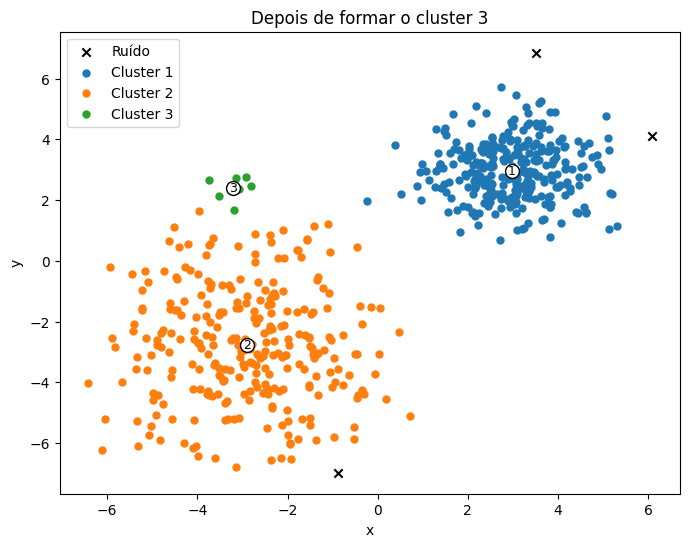

Clusters encontrados {label:count}:
-1 12
1 298
2 283
3 7
Percentagem de ruído: 2.00%


In [ ]:
np.random.seed(42)
save_snapshots = False
snapshot_dir = "snapshots"
show_intermediate = True 

if save_snapshots:
    os.makedirs(snapshot_dir, exist_ok=True)

# Epsilon e Número Mínimo de Pontos
eps = 0.9
min_pontos = 5

# Gerar dados
meanA = [3, 3]
covA = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(meanA, covA, 300)

meanB = [-3, -3]
covB = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(meanB, covB, 300)

c = np.vstack((a, b))

# Funções
def plot_clusters(data, labels, title="Agrupamento por densidade", save_path=None):
    labels = np.array(labels)
    unique = np.unique(labels)
    plt.figure(figsize=(8, 6))
    for lab in unique:
        pts = data[labels == lab]
        if lab == -1:
            plt.scatter(pts[:, 0], pts[:, 1], c='k', marker='x', label="Ruído")
        elif lab > 0:  # Só plota clusters com ID > 0
            plt.scatter(pts[:, 0], pts[:, 1], label=f'Cluster {lab}', s=25)
    
    # Centroides (labels > 0)
    for lab in unique:
        if lab > 0:  # Só plota centroides para clusters com ID > 0
            pts = data[labels == lab]
            centroid = pts.mean(axis=0)
            plt.scatter(centroid[0], centroid[1], c="white", edgecolors="black", s=100, marker='o')
            plt.text(centroid[0], centroid[1], f"{lab}", color="black", fontsize=9, ha="center", va="center")
    
    plt.title(title)
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=150)
        plt.close()
    else:
        plt.show()

# Lista de índices dos pontos com distância ao ponto idx < eps
def vizinhanca(data, idx, eps):
    dists = np.linalg.norm(data - data[idx], axis=1)
    return list(np.where(dists < eps)[0])

# Implementação do DBSCAN
def dbscan(data, eps=0.5, min_pts=5, snapshot_dir=None, show_each_cluster=False):
    n = len(data)
    labels = np.zeros(n, dtype=int)  # 0 = não visitado, -1 = ruído, >0 IDs de cluster
    cluster_id = 0  # Mantém 0 como inicial, mas incrementa para 1 no primeiro cluster

    for i in range(n):
        if labels[i] != 0:  # já foi visitado
            continue
        vizinhos = vizinhanca(data, i, eps)
        if len(vizinhos) < min_pts:
            labels[i] = -1  # ruído
        else:
            cluster_id += 1  # incrementa para 1 no primeiro cluster
            labels[i] = cluster_id
            queue = vizinhos.copy()
            k = 0
            while k < len(queue):
                j = queue[k]
                if labels[j] == -1:
                    labels[j] = cluster_id
                elif labels[j] == 0:
                    labels[j] = cluster_id
                    neigh_j = vizinhanca(data, j, eps)
                    if len(neigh_j) >= min_pts:
                        queue.extend([x for x in neigh_j if x not in queue])
                k += 1
            
            if snapshot_dir:
                fname = os.path.join(snapshot_dir, f"cluster_{cluster_id:02d}.png")
                plot_clusters(data, labels, title=f"Depois de formar o cluster {cluster_id}", save_path=fname)
            elif show_each_cluster:
                plot_clusters(data, labels, title=f"Depois de formar o cluster {cluster_id}")
    return labels

# Executar
labels = dbscan(c, eps=eps, min_pts=min_pontos, snapshot_dir=snapshot_dir if save_snapshots else None, show_each_cluster=show_intermediate)

# Estatística adicional
unique, counts = np.unique(labels, return_counts=True)
print("Clusters encontrados {label:count}:")
for u, cnt in zip(unique, counts):
    print(u, cnt)
print("Percentagem de ruído: {:.2f}%".format(100 * (counts[unique == -1].sum() if -1 in unique else 0) / len(labels)))